In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data set
This part is reading data from the xls file to pandas DataFrame. Temporarily, we will use the mpMRI_FeatureList_CQ.xls

In [2]:
df = pd.read_excel('mpMRI_FeatureList_CQ.xls')

## Explore the dataset

In [3]:
df.head()

,ID,ADC_Max,ADC_Min,ADC_Mean,ADC_Median,ADC_std,ADC_Variance,T2_Max,T2_Min,T2_Mean,...,DM_ADC_difENT,DM_ADC_sumAve,DM_ADC_sumENT,DM_ADC_sumVar,StudyDate,PSA,Gleason,Risk,Location,PIRADS
0,1,1123,745,921.000000,903.0,119.920807,14381.000000,401,260,326.641975,...,2.317684,16.083333,2.866116,76.937500,2014-05-19 00:00:00,6.38,6,Low,PZ,3
1,2,949,690,869.440000,891.0,69.179766,4785.840000,489,260,359.284585,...,2.138191,27.228395,3.011417,73.991046,2014-12-02 00:00:00,4.10,6,Low,TZ,4
2,3,1363,1079,1171.769231,1118.0,97.800097,9564.858974,339,209,263.382166,...,2.058207,11.069444,2.774970,104.731289,2015-02-24 00:00:00,2.50,6,Low,PZ,3
3,4,1339,729,968.326531,952.0,156.219849,24404.641160,317,195,247.812183,...,2.397585,15.545977,3.315552,79.023748,2014-01-08 00:00:00,4.50,6,Low,TZ,3
4,5,1608,1172,1319.384615,1335.0,123.699595,15301.589740,480,345,386.560000,...,2.356139,10.944444,2.722887,60.746914,2014-01-29 00:00:00,3.85,6,Low,PZ,3


Keys on the dataset. The meaning of them are unknown. 

In [4]:
sorted([str(x) for x in df.keys()])

['ADC_Axi_EV_Phase',
 'ADC_Axi_SumF2',
 'ADC_Axi_SumF2_1',
 'ADC_Cor_EV_Phase',
 'ADC_Cor_SumF2',
 'ADC_Cor_SumF2_1',
 'ADC_Max',
 'ADC_Mean',
 'ADC_Median',
 'ADC_Min',
 'ADC_Sag_EV_Phase',
 'ADC_Sag_SumF2',
 'ADC_Sag_SumF2_1',
 'ADC_Variance',
 'ADC_std',
 'CM_ADC_ASM',
 'CM_ADC_CON',
 'CM_ADC_Correlation',
 'CM_ADC_DIS',
 'CM_ADC_ENT',
 'CM_ADC_HOM',
 'CM_ADC_IDM',
 'CM_ADC_IMC1',
 'CM_ADC_IMC2',
 'CM_ADC_MCC',
 'CM_ADC_Mean',
 'CM_ADC_SQV',
 'CM_ADC_StdDev',
 'CM_ADC_Uniformity',
 'CM_ADC_Var',
 'CM_ADC_difAve',
 'CM_ADC_difENT',
 'CM_ADC_sumAve',
 'CM_ADC_sumENT',
 'CM_ADC_sumVar',
 'CM_T2_ASM',
 'CM_T2_CON',
 'CM_T2_Correlation',
 'CM_T2_DIS',
 'CM_T2_ENT',
 'CM_T2_HOM',
 'CM_T2_IDM',
 'CM_T2_IMC1',
 'CM_T2_IMC2',
 'CM_T2_MCC',
 'CM_T2_Mean',
 'CM_T2_SQV',
 'CM_T2_StdDev',
 'CM_T2_Uniformity',
 'CM_T2_Var',
 'CM_T2_difAve',
 'CM_T2_difENT',
 'CM_T2_sumAve',
 'CM_T2_sumENT',
 'CM_T2_sumVar',
 'DM_ADC_ASM',
 'DM_ADC_CON',
 'DM_ADC_Correlation',
 'DM_ADC_DIS',
 'DM_ADC_ENT',
 'DM_AD

In [5]:
print 'columns: ', len(df.keys())
print 'rows: ', len(df)

columns:  117
rows:  68


The first columns is the ID. We just drop them. However, the number of features is even higher than the data.

In [6]:
del df['ID']

In [7]:
df.head()

,ADC_Max,ADC_Min,ADC_Mean,ADC_Median,ADC_std,ADC_Variance,T2_Max,T2_Min,T2_Mean,T2_Median,...,DM_ADC_difENT,DM_ADC_sumAve,DM_ADC_sumENT,DM_ADC_sumVar,StudyDate,PSA,Gleason,Risk,Location,PIRADS
0,1123,745,921.000000,903.0,119.920807,14381.000000,401,260,326.641975,328,...,2.317684,16.083333,2.866116,76.937500,2014-05-19 00:00:00,6.38,6,Low,PZ,3
1,949,690,869.440000,891.0,69.179766,4785.840000,489,260,359.284585,355,...,2.138191,27.228395,3.011417,73.991046,2014-12-02 00:00:00,4.10,6,Low,TZ,4
2,1363,1079,1171.769231,1118.0,97.800097,9564.858974,339,209,263.382166,260,...,2.058207,11.069444,2.774970,104.731289,2015-02-24 00:00:00,2.50,6,Low,PZ,3
3,1339,729,968.326531,952.0,156.219849,24404.641160,317,195,247.812183,245,...,2.397585,15.545977,3.315552,79.023748,2014-01-08 00:00:00,4.50,6,Low,TZ,3
4,1608,1172,1319.384615,1335.0,123.699595,15301.589740,480,345,386.560000,374,...,2.356139,10.944444,2.722887,60.746914,2014-01-29 00:00:00,3.85,6,Low,PZ,3


### The target is Risk.

In [8]:
df.Risk.value_counts()

Intermediate    34
Low             20
High            14
Name: Risk, dtype: int64

There are 3 kinds of classes. Totally, we have 68 rows of records.

In [9]:
y = df['Risk']

### Study Date

In [10]:
df['StudyDate'].head()

0    2014-05-19 00:00:00
1    2014-12-02 00:00:00
2    2015-02-24 00:00:00
3    2014-01-08 00:00:00
4    2014-01-29 00:00:00
Name: StudyDate, dtype: object

In [11]:
import datetime
time_stamp_data = map(lambda x : (x - datetime.datetime(1970, 1, 1)).total_seconds(), df['StudyDate'])

In [12]:
for i in range(len(time_stamp_data)):
    if time_stamp_data[i] > 3 * np.average(time_stamp_data):
        print df['StudyDate'][i], i

2914-12-09 00:00:00 30
2914-12-09 00:00:00 57


It seems a typo. So I fix it.

In [13]:
df.loc[30, 'StudyDate'] = datetime.datetime(2014, 12, 9, 0, 0)
df.loc[57, 'StudyDate'] = datetime.datetime(2014, 12, 9, 0, 0)

In [14]:
time_stamp_data = map(lambda x : (x - datetime.datetime(1970, 1, 1)).total_seconds(), df['StudyDate'])

<IPython.core.display.Javascript object>


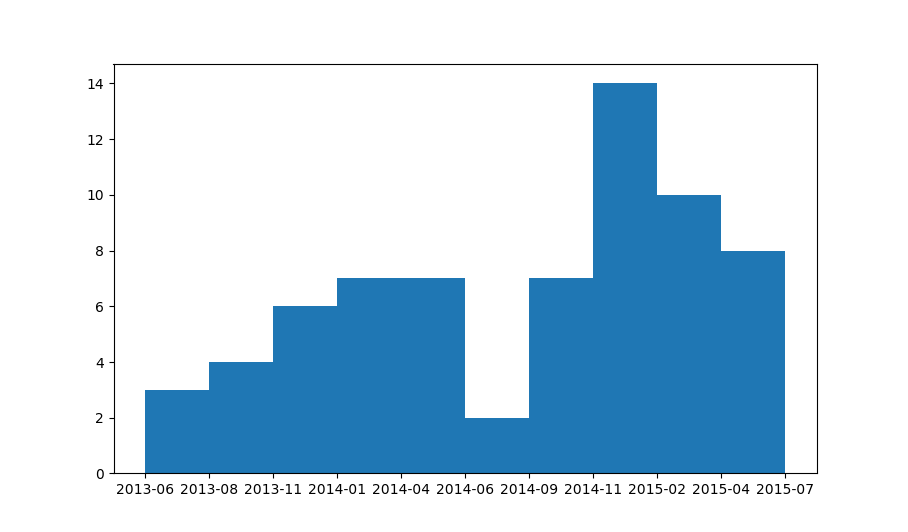

In [16]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(1,1)
n, bins, patches = ax.hist(time_stamp_data)
time_tick = map(lambda x : datetime.datetime.fromtimestamp(x).strftime("%Y-%m"), bins)
plt.xticks(bins, time_tick)
plt.show()

### Location


In [17]:
df.Location.value_counts()

PZ    56
TZ    12
Name: Location, dtype: int64

There only two kinds of locations

### Others

In [18]:
df.mean()

ADC_Max               1.274368e+03
ADC_Min               7.514118e+02
ADC_Mean              9.745713e+02
ADC_Median            9.630221e+02
ADC_std               1.255680e+02
ADC_Variance          1.987693e+04
T2_Max                4.547206e+02
T2_Min                2.771471e+02
T2_Mean               3.580963e+02
T2_Median             3.561912e+02
T2_std                3.327448e+01
T2_Variance           1.206673e+03
ADC_Axi_EV_Phase      2.712229e+00
ADC_Axi_SumF2         9.391456e+08
ADC_Axi_SumF2_1       2.165513e+08
ADC_Cor_EV_Phase      3.432479e+00
ADC_Cor_SumF2         4.818119e+08
ADC_Cor_SumF2_1       1.113043e+08
ADC_Sag_EV_Phase      3.330920e+00
ADC_Sag_SumF2         4.982042e+08
ADC_Sag_SumF2_1       1.151681e+08
T2_Axi_EV_Phase       2.709418e+00
T2_Axi_SumF2          5.428897e+08
T2_Axi_SumF2_1        1.219459e+08
T2_Cor_EV_Phase       3.256593e+00
T2_Cor_SumF2          2.063648e+08
T2_Cor_SumF2_1        4.564152e+07
T2_Sag_EV_Phase       3.289053e+00
T2_Sag_SumF2        

Others are just numerial data, but they have different scale.

## Preprocessing


### Drop unused columns

In [19]:
unused_columns = ['StudyDate','PSA','Gleason','Location','PIRADS']
for col in unused_columns:
    del df[col]

### Encoding categorial features

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
keys = list(set(df['Risk']))
label_enc = LabelEncoder()
label_enc.fit(keys)
for key in keys:
    print key, ' => ', label_enc.transform([key])

High  =>  [0]
Intermediate  =>  [1]
Low  =>  [2]


In [22]:
vals = label_enc.transform(keys).reshape(-1, 1)
vals

array([[0],
       [1],
       [2]])

In [23]:
enc = OneHotEncoder()
enc.fit(vals)
for key in keys:
    print key, ' => ', enc.transform([label_enc.transform([key])]).toarray().astype('int')

High  =>  [[1 0 0]]
Intermediate  =>  [[0 1 0]]
Low  =>  [[0 0 1]]


In [24]:
codes = enc.transform(label_enc.transform(df['Risk']).reshape(-1, 1)).toarray().astype('int')

In [25]:
for key in keys:
    df['Risk_' + key] = codes[:,keys.index(key)]

In [26]:
df[['Risk'] + ['Risk_' + key for key in keys]]

,Risk,Risk_High,Risk_Intermediate,Risk_Low
0,Low,0,0,1
1,Low,0,0,1
2,Low,0,0,1
3,Low,0,0,1
4,Low,0,0,1
5,Low,0,0,1
6,Low,0,0,1
7,Low,0,0,1
8,Low,0,0,1
9,Low,0,0,1


In [27]:
del df['Risk']

### Standardization

In [28]:
X = df.iloc[:,:-3]
Y = df.iloc[:,-3:]

In [29]:
X.head()

,ADC_Max,ADC_Min,ADC_Mean,ADC_Median,ADC_std,ADC_Variance,T2_Max,T2_Min,T2_Mean,T2_Median,...,DM_ADC_Mean,DM_ADC_SQV,DM_ADC_StdDev,DM_ADC_Uniformity,DM_ADC_Var,DM_ADC_difAve,DM_ADC_difENT,DM_ADC_sumAve,DM_ADC_sumENT,DM_ADC_sumVar
0,1123,745,921.000000,903.0,119.920807,14381.000000,401,260,326.641975,328,...,8.041667,80.416667,8.967534,0.161673,30.831597,-11.709877,2.317684,16.083333,2.866116,76.937500
1,949,690,869.440000,891.0,69.179766,4785.840000,489,260,359.284585,355,...,13.614198,182.200617,13.498171,0.155918,23.082638,-6.347394,2.138191,27.228395,3.011417,73.991046
2,1363,1079,1171.769231,1118.0,97.800097,9564.858974,339,209,263.382166,260,...,5.534722,57.118056,7.557649,0.197886,36.554350,-22.345486,2.058207,11.069444,2.774970,104.731289
3,1339,729,968.326531,952.0,156.219849,24404.641160,317,195,247.812183,245,...,7.772989,72.094828,8.490867,0.108760,26.221454,-9.953891,2.397585,15.545977,3.315552,79.023748
4,1608,1172,1319.384615,1335.0,123.699595,15301.589740,480,345,386.560000,374,...,5.472222,44.097222,6.640574,0.188654,24.096451,-12.277778,2.356139,10.944444,2.722887,60.746914


In [30]:
Y.head()

,Risk_High,Risk_Intermediate,Risk_Low
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [31]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [32]:
X_std

array([[-0.55418247, -0.02607063, -0.25385705, ...,  0.19080821,
        -1.0443829 ,  0.51837601],
       [-1.19122579, -0.249704  , -0.49818315, ...,  3.26365407,
        -0.40056976,  0.38610314],
       [ 0.32449798,  1.33199383,  0.9344569 , ..., -1.1915895 ,
        -1.44824549,  1.76610077],
       ..., 
       [-0.27959483, -1.13610535, -0.97530574, ..., -0.32068972,
         1.21897403,  0.50976477],
       [ 1.82923825, -1.26215324,  0.00715055, ..., -0.15507246,
        -0.39624498, -1.7308069 ],
       [-0.08921406,  0.59197068,  0.38987375, ..., -0.27637329,
        -1.71836846,  1.13664851]])

### PCA analysis

#### Covariance Matrix

In [33]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
print cov_mat.shape

(110, 110)


In [34]:
import plotly.plotly as py
import plotly.graph_objs as go
trace = go.Heatmap(z=cov_mat)
data=[trace]
py.iplot(data)

In [35]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -7.41459666e-02+0.j   4.40149134e-02+0.j  -1.82331067e-02+0.j ...,
   -8.85707179e-12+0.j   1.56362450e-11+0.j  -4.57354260e-12+0.j]
 [  2.08062276e-02+0.j   7.50253925e-02+0.j  -4.62839875e-02+0.j ...,
   -1.57222581e-11+0.j   2.77527391e-11+0.j  -8.11320215e-12+0.j]
 [ -2.72502724e-02+0.j   4.97907137e-02+0.j  -8.28726646e-02+0.j ...,
    3.17270135e-11+0.j  -5.60116015e-11+0.j   1.63808759e-11+0.j]
 ..., 
 [ -3.31014866e-02+0.j  -1.14429263e-01+0.j  -1.87898262e-01+0.j ...,
    6.77379928e-04+0.j  -1.19619604e-03+0.j   3.50063343e-04+0.j]
 [ -9.00026257e-02+0.j  -1.43096589e-01+0.j  -1.31661531e-01+0.j ...,
   -3.21498687e-04+0.j   5.67555509e-04+0.j  -1.66103697e-04+0.j]
 [  4.32761538e-02+0.j   5.00301601e-03+0.j  -2.13865382e-01+0.j ...,
   -7.33117022e-04+0.j   1.29391147e-03+0.j  -3.78513166e-04+0.j]]
Eigenvalues 
[  2.85771638e+01 +0.00000000e+00j   1.88704583e+01 +0.00000000e+00j
   1.25687064e+01 +0.00000000e+00j   1.00931665e+01 +0.00000000e+00j
   6.886854

In [36]:
tr0 = go.Scatter(y=np.abs(eig_vals))
data = go.Data([tr0])
layout=go.Layout(title="Covariance Matrix Eigenvalues", xaxis={'title':'index'},yaxis={'title':'abs'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### Correlation Matrix

In [37]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ -7.41459666e-02 +0.00000000e+00j   4.40149134e-02 +0.00000000e+00j
   -1.82331067e-02 +0.00000000e+00j ...,   6.42388636e-12 +0.00000000e+00j
   -2.82006178e-11 -1.73125358e-11j  -2.82006178e-11 +1.73125358e-11j]
 [  2.08062276e-02 +0.00000000e+00j   7.50253925e-02 +0.00000000e+00j
   -4.62839875e-02 +0.00000000e+00j ...,  -1.24759178e-11 +0.00000000e+00j
    5.47762034e-11 +3.36233776e-11j   5.47762034e-11 -3.36233776e-11j]
 [ -2.72502724e-02 +0.00000000e+00j   4.97907137e-02 +0.00000000e+00j
   -8.28726646e-02 +0.00000000e+00j ...,   3.08737943e-11 +0.00000000e+00j
   -1.35553498e-10 -8.32058214e-11j  -1.35553498e-10 +8.32058214e-11j]
 ..., 
 [ -3.31014866e-02 +0.00000000e+00j  -1.14429263e-01 +0.00000000e+00j
   -1.87898262e-01 +0.00000000e+00j ...,  -2.16949368e-04 +0.00000000e+00j
    9.52946824e-04 +5.84977588e-04j   9.52946824e-04 -5.84977588e-04j]
 [ -9.00026257e-02 +0.00000000e+00j  -1.43096589e-01 +0.00000000e+00j
   -1.31661531e-01 +0.00000000e+00j ...,  -5.

In [38]:
tr0 = go.Scatter(y=np.abs(eig_vals))
data = go.Data([tr0])
layout=go.Layout(title="Correlation Matrix Eigenvalues", xaxis={'title':'index'},yaxis={'title':'abs'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### Singular Vector Decomposition

In [39]:
u,s,v = np.linalg.svd(X_std.T)

In [40]:
tr0 = go.Scatter(y=np.abs(s))
data = go.Data([tr0])
layout=go.Layout(title="Singular Values", xaxis={'title':'Index'},yaxis={'title':'Singular Values'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### Selecting Principal Conponents

In [41]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs,key=lambda x : x[0],reverse=True)

In [42]:
for i in eig_pairs:
    print i[0]

28.1569113655
18.5929515462
12.3838724576
9.94473756258
6.78557722287
5.60706966303
5.04118637497
4.31423883555
3.39310434826
2.46251612765
2.37231363217
1.96348570317
1.43341202131
1.21279856367
1.08014338783
0.782944296192
0.671053284246
0.614061509297
0.516871017254
0.455563537634
0.408203421462
0.297937714802
0.286351457654
0.213530162776
0.161990656079
0.14760114229
0.114674699296
0.0973925177755
0.083987354074
0.0691184926825
0.0585458984163
0.0475855527153
0.0365491410526
0.0303520122564
0.0276728021883
0.0232772970095
0.0218108729641
0.0127338399696
0.0117414578686
0.0112997353586
0.00897725437853
0.00813346503879
0.00760261403166
0.00686636080533
0.00426021934042
0.00336412016272
0.00284534152645
0.0024499097863
0.00197681633302
0.00177972346497
0.00133467502182
0.000931336591211
0.000679053149198
0.000469321443444
0.000357145522874
0.000307787664415
0.000167468840482
0.000106267083977
9.30611616017e-05
5.53479360648e-05
3.89012191323e-05
1.80522554862e-05
1.31232126189e-05
3.

In [43]:
rng = np.r_[1:14:2, 14, 15:23:5,23, 24:31:5,31:51:10, 51:64:2, 65:len(eig_vals):40, len(eig_vals)]
tot = sum(np.abs(eig_vals))
var_exp = [(i / tot)*100 for i in sorted(np.abs(eig_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)
var_exp = np.array(var_exp)


trace1 = go.Bar(
        x=['PC %s' %i for i in rng],
        y=var_exp[np.array(rng) - 1],
        showlegend=False)

trace2 = go.Scatter(
        x=['PC %s' %i for i in rng], 
        y=cum_var_exp[np.array(rng) - 1],
        name='cumulative explained variance')

data = go.Data([trace1, trace2])

x95 = (np.abs(cum_var_exp[np.array(rng) - 1] - 95)).argmin()
x99 = (np.abs(cum_var_exp[np.array(rng) - 1] - 99)).argmin()
x9999 = (np.abs(cum_var_exp[np.array(rng) - 1] - 99.9)).argmin()
d100 = np.abs(cum_var_exp[np.array(rng) - 1] - 100)
x100 = np.where(d100 < 1e-06)[0][0]

annotations=[
        dict(
            x=x95,
            y=cum_var_exp[np.array(rng) - 1][x95],
            xref='x',
            yref='y',
            text=str(np.round(cum_var_exp[np.array(rng) - 1][x95], 2)) + '%, ' + str(rng[x95]),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=40
        ),
        dict(
            x=x99,
            y=cum_var_exp[np.array(rng) - 1][x99],
            xref='x',
            yref='y',
            text=str(np.round(cum_var_exp[np.array(rng) - 1][x99], 2)) + '%, ' + str(rng[x99]),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        ),
        dict(
            x=x9999,
            y=cum_var_exp[np.array(rng) - 1][x9999],
            xref='x',
            yref='y',
            text=str(np.round(cum_var_exp[np.array(rng) - 1][x9999], 2)) + '%, ' + str(rng[x9999]),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=40
        ),
        dict(
            x=x100,
            y=cum_var_exp[np.array(rng) - 1][x100],
            xref='x',
            yref='y',
            text=str(np.round(cum_var_exp[np.array(rng) - 1][x100], 2)) + '%, ' + str(rng[x100]),
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-40
        )
    ]

layout=go.Layout(
        yaxis=go.YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components',annotations=annotations)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [44]:
pc = 24

matrix_w = np.hstack((np.abs(eig_pairs[0][1]).reshape(110, 1), np.abs(eig_pairs[1][1]).reshape(110, 1)))
for eig_pair in eig_pairs[2:pc]:
    matrix_w = np.hstack((matrix_w, np.abs(eig_pair[1]).reshape(110, 1)))
matrix_w.shape

(110, 24)

In [45]:
X_reduced = X_std.dot(matrix_w)

In [46]:
start = 0
traces = []
for name in ('Low', 'Intermediate', 'High'):

    trace = go.Scatter3d(
        x=X_reduced[y==name,start + 0],
        y=X_reduced[y==name,start + 1],
        z=X_reduced[y==name,start + 2],
        mode='markers',
        name=name,
        marker=go.Marker(
            size=12,
            line=go.Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(showlegend=True,
                scene=go.Scene(xaxis=go.XAxis(title='PC1'),
                yaxis=go.YAxis(title='PC2'),zaxis=go.ZAxis(title='PC3'),))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

t-SNE

## Classification

### Validation

In [47]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True) # 80% train, 20% test
train_test_pairs = []
for train_idx, test_idx in kf.split(X_reduced):
    train_test_pairs.append((train_idx, test_idx))

In [48]:
train_test_pairs[0][1]

array([ 2,  4,  9, 18, 24, 31, 33, 46, 48, 50, 51, 54, 61, 66])

In [49]:
for i in train_test_pairs[0][1]:
    print y[i]

Low
Low
Low
Low
Intermediate
Intermediate
Intermediate
Intermediate
Intermediate
Intermediate
Intermediate
High
High
Intermediate


#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

##### with pca data

In [51]:
dt = DecisionTreeClassifier(random_state=0)

In [52]:
train_idx, test_idx = train_test_pairs[0]
dt.fit(X_reduced[train_idx],y[train_idx])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [53]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_reduced[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Low
Low  =>  High
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  High
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
High  =>  Intermediate
High  =>  Low
Intermediate  =>  High
Accuracy is  35.7142857143


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_confusionMatrix(y_test, y_pred):
    mx_df = pd.DataFrame(confusion_matrix([str(yt) for yt in y_test], [str(yp) for yp in y_pred], labels=['Low', 'Intermediate', 'High']), 
                     index=['Low', 'Intermediate', 'High'], 
                     columns=['Low', 'Intermediate', 'High'])
    plt.figure(figsize = (6,6))
    sn.heatmap(mx_df, annot=True)

<IPython.core.display.Javascript object>


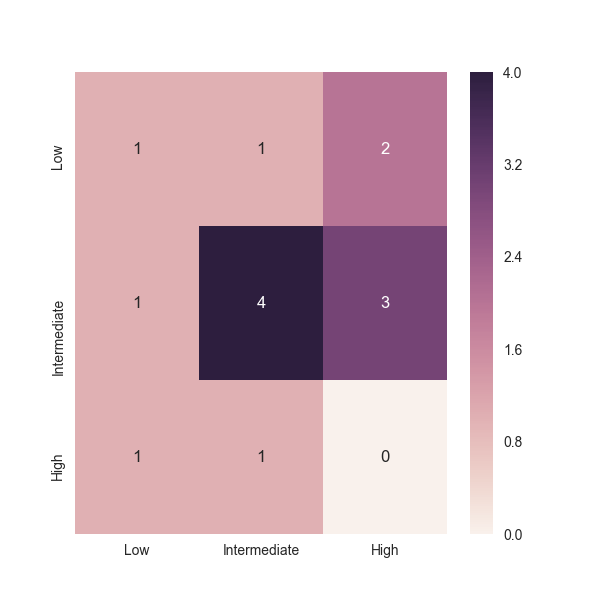

In [56]:
plot_confusionMatrix(y_test, y_pred)

In [57]:
dt_accs = []
for i in range(len(train_test_pairs)):
    dt = DecisionTreeClassifier(random_state=0)
    train_idx, test_idx = train_test_pairs[i]
    dt.fit(X_reduced[train_idx],y[train_idx])
    y_pred = dt.predict(X_reduced[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    dt_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  35.7142857143
Accuracy 1 is  57.1428571429
Accuracy 2 is  50.0
Accuracy 3 is  53.8461538462
Accuracy 4 is  46.1538461538


##### with original data

In [58]:
dt = DecisionTreeClassifier(random_state=0)
train_idx, test_idx = train_test_pairs[0]
dt.fit(X_std[train_idx],y[train_idx])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [59]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_std[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Low
Low  =>  Intermediate
Low  =>  High
Low  =>  Low
Intermediate  =>  Low
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
High  =>  Low
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  50.0


<IPython.core.display.Javascript object>


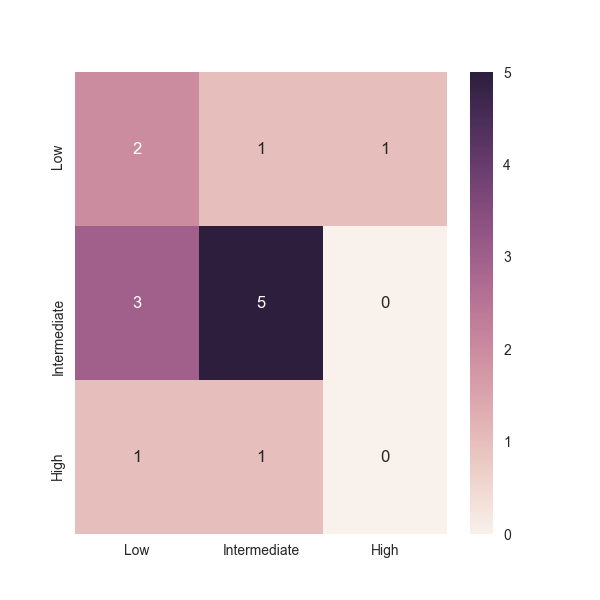

In [60]:
plot_confusionMatrix(y_test, y_pred)

In [61]:
dt_org_accs = []
for i in range(len(train_test_pairs)):
    dt = DecisionTreeClassifier(random_state=0)
    train_idx, test_idx = train_test_pairs[i]
    dt.fit(X_std[train_idx],y[train_idx])
    y_pred = dt.predict(X_std[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    dt_org_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  50.0
Accuracy 1 is  21.4285714286
Accuracy 2 is  28.5714285714
Accuracy 3 is  23.0769230769
Accuracy 4 is  53.8461538462


#### SVM

##### with pca data

In [62]:
from sklearn import svm
train_idx, test_idx = train_test_pairs[0]
svm_clf = svm.SVC()
svm_clf.fit(X_reduced[train_idx],y[train_idx])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred = svm_clf.predict(X_reduced[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Intermediate
Low  =>  Intermediate
Low  =>  Intermediate
Low  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
High  =>  High
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  57.1428571429


<IPython.core.display.Javascript object>


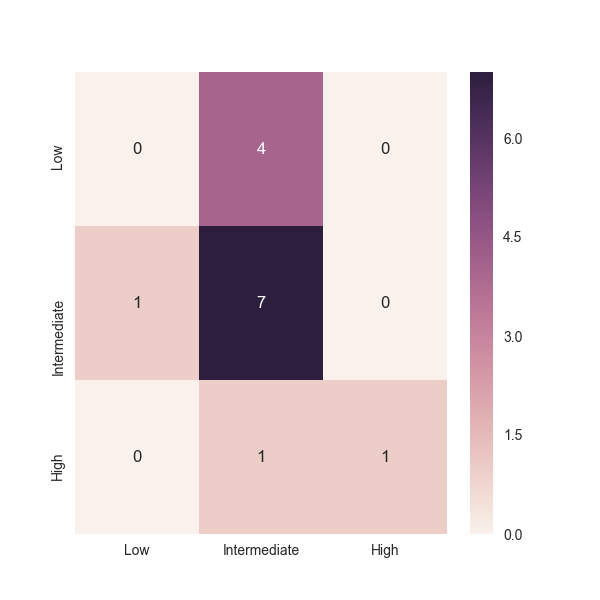

In [65]:
plot_confusionMatrix(y_test, y_pred)

In [66]:
svm_accs = []
for i in range(len(train_test_pairs)):
    svm_clf = svm.SVC()
    train_idx, test_idx = train_test_pairs[i]
    svm_clf.fit(X_reduced[train_idx],y[train_idx])
    y_pred = svm_clf.predict(X_reduced[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    svm_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  57.1428571429
Accuracy 1 is  42.8571428571
Accuracy 2 is  42.8571428571
Accuracy 3 is  23.0769230769
Accuracy 4 is  53.8461538462


##### with original data

In [67]:
train_idx, test_idx = train_test_pairs[0]
svm_clf = svm.SVC()
svm_clf.fit(X_std[train_idx],y[train_idx])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
y_pred = svm_clf.predict(X_std[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Intermediate
Low  =>  Low
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
High  =>  Intermediate
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  57.1428571429


<IPython.core.display.Javascript object>


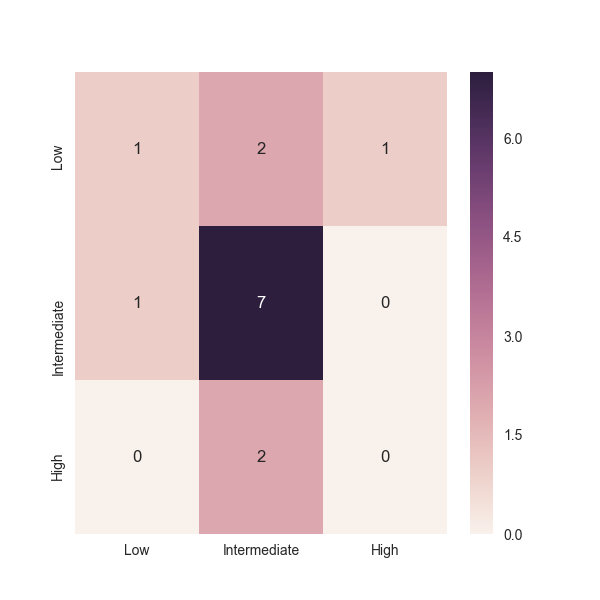

In [69]:
plot_confusionMatrix(y_test, y_pred)

In [70]:
svm_org_accs = []
for i in range(len(train_test_pairs)):
    svm_clf = svm.SVC()
    train_idx, test_idx = train_test_pairs[i]
    svm_clf.fit(X_std[train_idx],y[train_idx])
    y_pred = svm_clf.predict(X_std[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    svm_org_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  57.1428571429
Accuracy 1 is  42.8571428571
Accuracy 2 is  42.8571428571
Accuracy 3 is  30.7692307692
Accuracy 4 is  53.8461538462


#### KNN

##### with pca data

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
neigh_clf = KNeighborsClassifier(n_neighbors=3)
train_idx, test_idx = train_test_pairs[0]
neigh_clf.fit(X_reduced[train_idx],y[train_idx])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [73]:
y_pred = neigh_clf.predict(X_reduced[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Intermediate
Low  =>  Low
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  High
Intermediate  =>  High
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
High  =>  High
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  42.8571428571


<IPython.core.display.Javascript object>


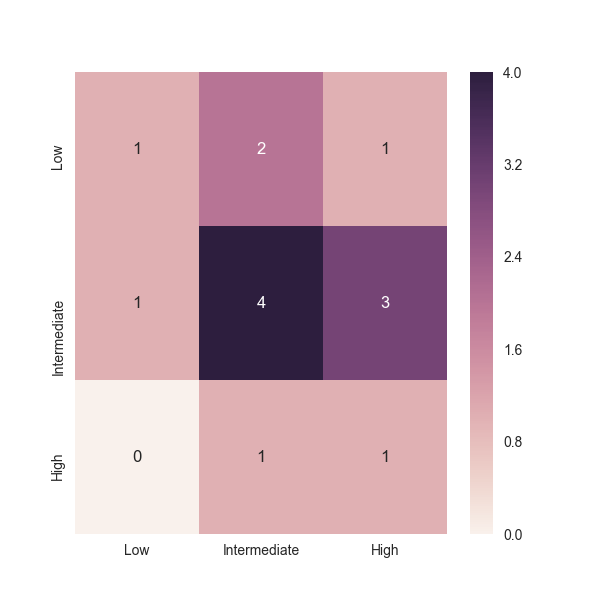

In [74]:
plot_confusionMatrix(y_test, y_pred)

In [75]:
knn_accs = []
for i in range(len(train_test_pairs)):
    neigh_clf = KNeighborsClassifier(n_neighbors=5)
    train_idx, test_idx = train_test_pairs[i]
    neigh_clf.fit(X_reduced[train_idx],y[train_idx])
    y_pred = neigh_clf.predict(X_reduced[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    knn_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  57.1428571429
Accuracy 1 is  50.0
Accuracy 2 is  42.8571428571
Accuracy 3 is  38.4615384615
Accuracy 4 is  38.4615384615


##### with origianl data

In [76]:
neigh_clf = KNeighborsClassifier(n_neighbors=3)
train_idx, test_idx = train_test_pairs[0]
neigh_clf.fit(X_std[train_idx],y[train_idx])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [77]:
y_pred = neigh_clf.predict(X_std[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  High
Low  =>  Low
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  Low
High  =>  Intermediate
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  35.7142857143


<IPython.core.display.Javascript object>


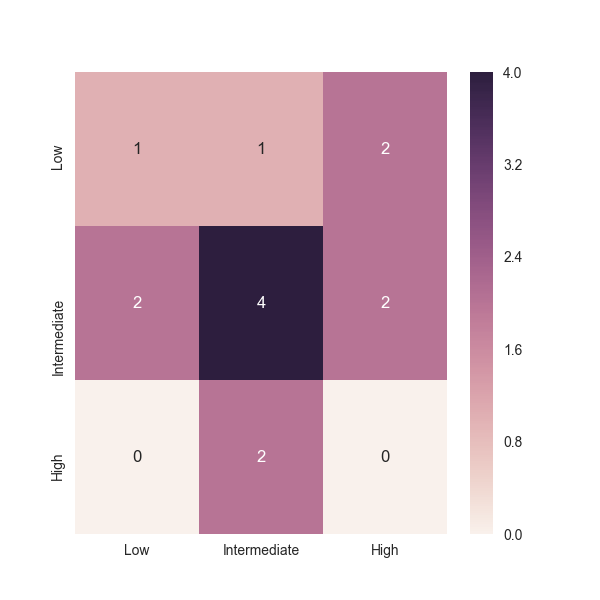

In [78]:
plot_confusionMatrix(y_test, y_pred)

In [79]:
knn_org_accs = []
for i in range(len(train_test_pairs)):
    neigh_clf = KNeighborsClassifier(n_neighbors=5)
    train_idx, test_idx = train_test_pairs[i]
    neigh_clf.fit(X_std[train_idx],y[train_idx])
    y_pred = neigh_clf.predict(X_std[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    knn_org_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  50.0
Accuracy 1 is  35.7142857143
Accuracy 2 is  42.8571428571
Accuracy 3 is  23.0769230769
Accuracy 4 is  61.5384615385


#### Random Forest

##### with pca data

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2,random_state=0)
train_idx, test_idx = train_test_pairs[0]
rf_clf.fit(X_reduced[train_idx],y[train_idx])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [81]:
y_pred = rf_clf.predict(X_reduced[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Low
Low  =>  Intermediate
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
High  =>  Low
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  50.0


<IPython.core.display.Javascript object>


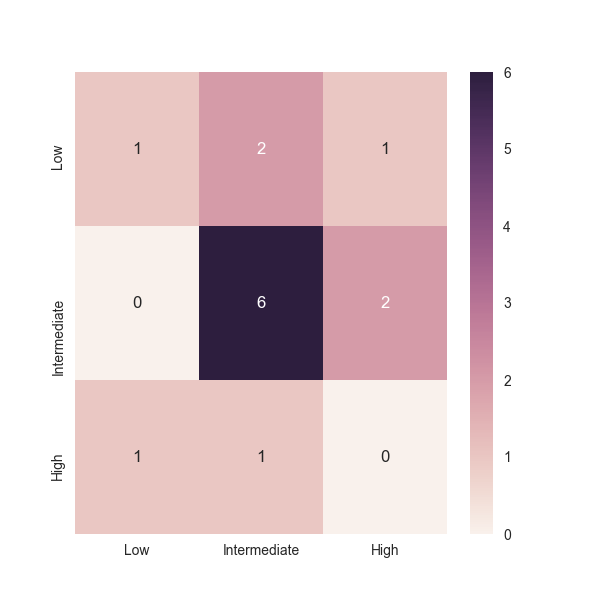

In [82]:
plot_confusionMatrix(y_test, y_pred)

In [83]:
rf_accs = []
for i in range(len(train_test_pairs)):
    rf_clf = RandomForestClassifier(max_depth=2,random_state=0)
    train_idx, test_idx = train_test_pairs[i]
    rf_clf.fit(X_reduced[train_idx],y[train_idx])
    y_pred = rf_clf.predict(X_reduced[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    rf_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  50.0
Accuracy 1 is  50.0
Accuracy 2 is  57.1428571429
Accuracy 3 is  38.4615384615
Accuracy 4 is  61.5384615385


##### with origianl data

In [84]:
rf_clf = RandomForestClassifier(max_depth=2,random_state=0)
train_idx, test_idx = train_test_pairs[0]
rf_clf.fit(X_std[train_idx],y[train_idx])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [85]:
y_pred = rf_clf.predict(X_std[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Low
Low  =>  Intermediate
Low  =>  Intermediate
Low  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
Intermediate  =>  Intermediate
High  =>  Intermediate
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  50.0


<IPython.core.display.Javascript object>


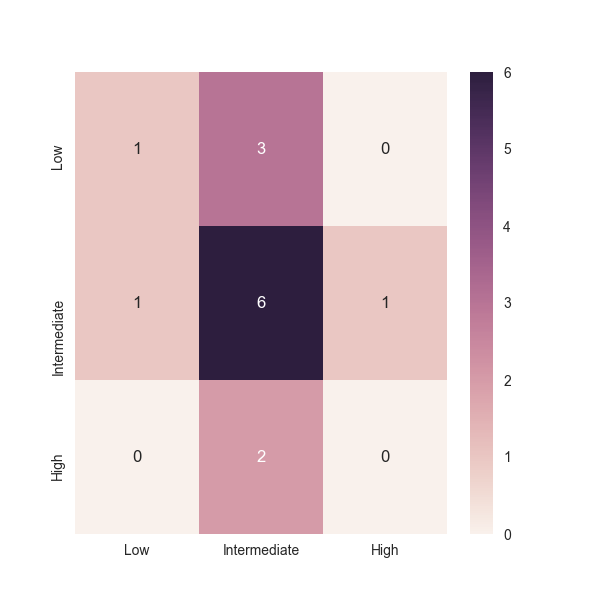

In [86]:
plot_confusionMatrix(y_test, y_pred)

In [87]:
rf_org_accs = []
for i in range(len(train_test_pairs)):
    rf_clf = RandomForestClassifier(max_depth=2,random_state=0)
    train_idx, test_idx = train_test_pairs[i]
    rf_clf.fit(X_std[train_idx],y[train_idx])
    y_pred = rf_clf.predict(X_std[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    rf_org_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  50.0
Accuracy 1 is  35.7142857143
Accuracy 2 is  42.8571428571
Accuracy 3 is  46.1538461538
Accuracy 4 is  46.1538461538


####  Naive Bayes

##### with pca data

In [88]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
train_idx, test_idx = train_test_pairs[0]
GNB_clf.fit(X_reduced[train_idx],y[train_idx])

GaussianNB(priors=None)

In [89]:
y_pred = GNB_clf.predict(X_reduced[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Intermediate
Low  =>  Intermediate
Low  =>  High
Low  =>  Intermediate
Intermediate  =>  High
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  Low
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
High  =>  High
High  =>  Intermediate
Intermediate  =>  Low
Accuracy is  28.5714285714


<IPython.core.display.Javascript object>


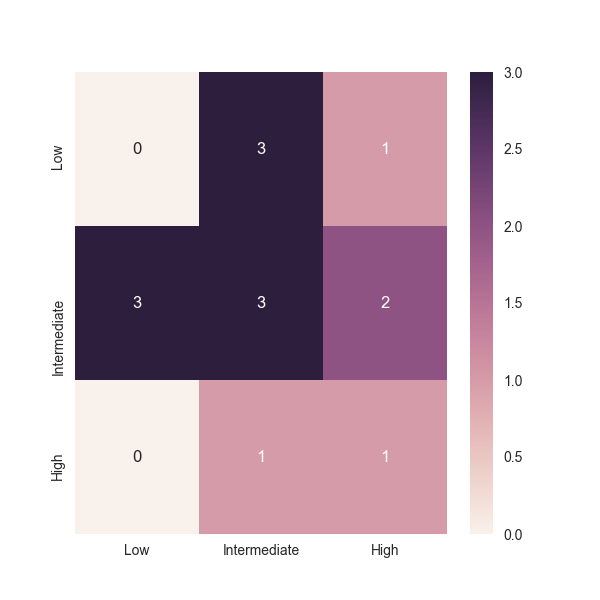

In [90]:
plot_confusionMatrix(y_test, y_pred)

In [91]:
nb_accs = []
for i in range(len(train_test_pairs)):
    GNB_clf = GaussianNB()
    train_idx, test_idx = train_test_pairs[i]
    GNB_clf.fit(X_reduced[train_idx],y[train_idx])
    y_pred = GNB_clf.predict(X_reduced[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    nb_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  28.5714285714
Accuracy 1 is  57.1428571429
Accuracy 2 is  42.8571428571
Accuracy 3 is  30.7692307692
Accuracy 4 is  38.4615384615


##### with origianl data

In [92]:
GNB_clf = GaussianNB()
train_idx, test_idx = train_test_pairs[0]
GNB_clf.fit(X_std[train_idx],y[train_idx])

GaussianNB(priors=None)

In [93]:
y_pred = GNB_clf.predict(X_std[test_idx])
y_test = y[test_idx]
for i,j in zip(y_test,y_pred):
    print i," => ",j
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Low  =>  Intermediate
Low  =>  Low
Low  =>  High
Low  =>  High
Intermediate  =>  High
Intermediate  =>  Low
Intermediate  =>  High
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Intermediate
Intermediate  =>  Low
High  =>  Low
High  =>  Intermediate
Intermediate  =>  Intermediate
Accuracy is  35.7142857143


<IPython.core.display.Javascript object>


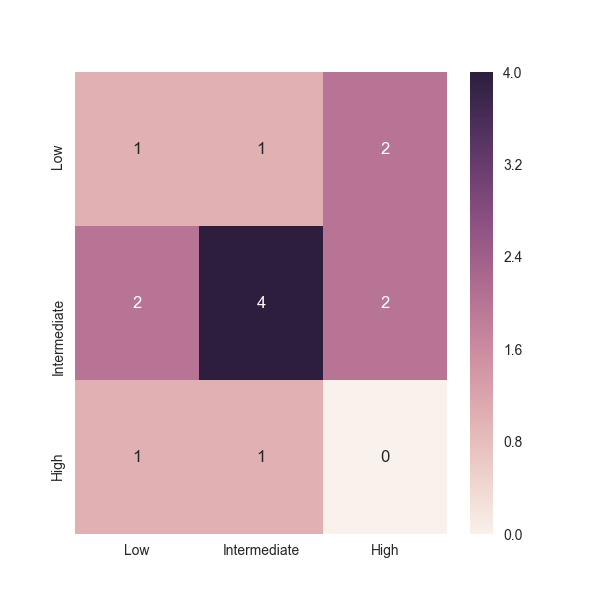

In [94]:
plot_confusionMatrix(y_test, y_pred)

In [95]:
nb_org_accs = []
for i in range(len(train_test_pairs)):
    GNB_clf = GaussianNB()
    train_idx, test_idx = train_test_pairs[i]
    GNB_clf.fit(X_std[train_idx],y[train_idx])
    y_pred = GNB_clf.predict(X_std[test_idx])
    y_test = y[test_idx]
    print "Accuracy %d is " % i, accuracy_score(y_test,y_pred)*100
    nb_org_accs.append(accuracy_score(y_test,y_pred))

Accuracy 0 is  35.7142857143
Accuracy 1 is  42.8571428571
Accuracy 2 is  35.7142857143
Accuracy 3 is  53.8461538462
Accuracy 4 is  30.7692307692


#### Comparision

In [96]:
acc_cmp_df = pd.DataFrame(np.array([dt_accs, dt_org_accs, 
                                    svm_accs, svm_org_accs,
                                    knn_accs, knn_org_accs,
                                    rf_accs, rf_org_accs,
                                    nb_accs, nb_org_accs]).T, 
                          columns=['DT', 'DT org',
                                   'SVM', 'SVM org',
                                   'KNN', 'KNN org',
                                   'RF', 'RF org',
                                   'NB', 'NB org'])
acc_cmp_df

,DT,DT org,SVM,SVM org,KNN,KNN org,RF,RF org,NB,NB org
0,0.357143,0.500000,0.571429,0.571429,0.571429,0.500000,0.500000,0.500000,0.285714,0.357143
1,0.571429,0.214286,0.428571,0.428571,0.500000,0.357143,0.500000,0.357143,0.571429,0.428571
2,0.500000,0.285714,0.428571,0.428571,0.428571,0.428571,0.571429,0.428571,0.428571,0.357143
3,0.538462,0.230769,0.230769,0.307692,0.384615,0.230769,0.384615,0.461538,0.307692,0.538462
4,0.461538,0.538462,0.538462,0.538462,0.384615,0.615385,0.615385,0.461538,0.384615,0.307692


In [97]:
acc_cmp_df.mean()

DT         0.485714
DT org     0.353846
SVM        0.439560
SVM org    0.454945
KNN        0.453846
KNN org    0.426374
RF         0.514286
RF org     0.441758
NB         0.395604
NB org     0.397802
dtype: float64

In [98]:
acc_cmp_df.min()

DT         0.357143
DT org     0.214286
SVM        0.230769
SVM org    0.307692
KNN        0.384615
KNN org    0.230769
RF         0.384615
RF org     0.357143
NB         0.285714
NB org     0.307692
dtype: float64